In [47]:
import numpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import normaltest

In [49]:
data = pd.read_csv('../data/california_housing_pricing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [50]:
data_dictionary = pd.read_csv('../data/data_dictionary.csv')
data_dictionary

,Field,Meaning
0,longitude,A measure of how far west a house is; a highe...
1,latitude,A measure of how far north a house is; a high...
2,housing_median_age,Median age of a house within a block; a lower...
3,total_rooms,Total number of rooms within a block
4,total_bedrooms,Total number of bedrooms within a block
5,population,Total number of people residing within a block
6,households,"Total number of households, a group of people..."
7,median_income),Median income for households within a block o...
8,median_house_value),Median house value for households within a bl...
9,ocean_proximityea,Location of the house w.r.t ocean/s


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [52]:
data.total_bedrooms = data.total_bedrooms.fillna(data.total_bedrooms.median())

In [53]:
numeric_cols = list(data.select_dtypes([int, float]).columns)
numeric_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

 EDA

In [54]:
normaltest(data.median_house_value.values)

NormaltestResult(statistic=2430.931051066072, pvalue=0.0)

Normality Test P-value: 0.0 ,    Decision:  not normally distributed


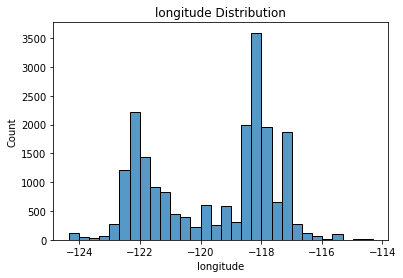

Normality Test P-value: 0.0 ,    Decision:  not normally distributed


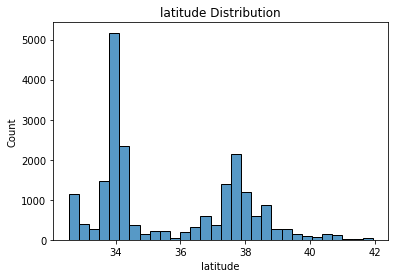

Normality Test P-value: 0.0 ,    Decision:  not normally distributed


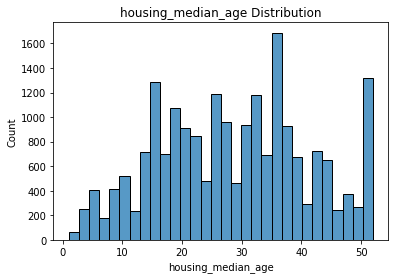

Normality Test P-value: 0.0 ,    Decision:  not normally distributed


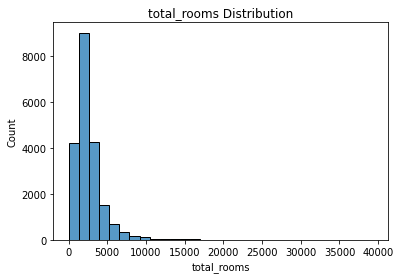

Normality Test P-value: 0.0 ,    Decision:  not normally distributed


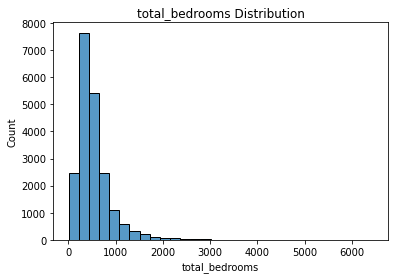

Normality Test P-value: 0.0 ,    Decision:  not normally distributed


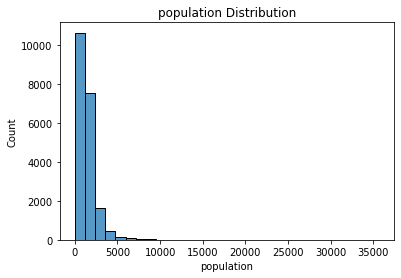

Normality Test P-value: 0.0 ,    Decision:  not normally distributed


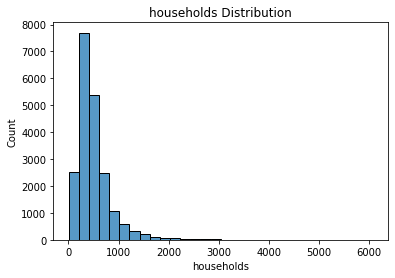

Normality Test P-value: 0.0 ,    Decision:  not normally distributed


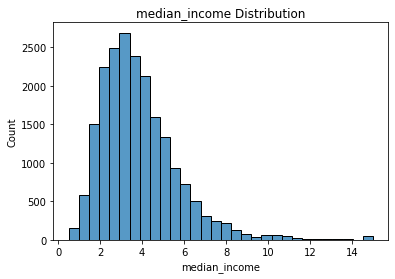

Normality Test P-value: 0.0 ,    Decision:  not normally distributed


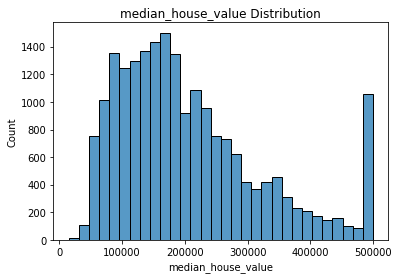

In [55]:
for col in numeric_cols:
    _, pvalue = normaltest(data[col].values)
    if pvalue < 0.05:
        result = 'not normally distributed'
    else:
        result = 'normally distributed'
    print('Normality Test P-value:',str(pvalue),',    Decision: ',result)
    
    plt.figure(figsize=(6,4))
    sns.histplot(data=data, x = col, bins=30)
    plt.title(f'{col} Distribution')
    plt.show()

The numeric columns including the targte are not normally distributed 

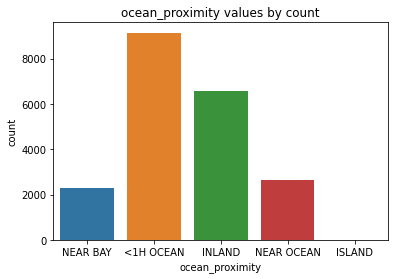

In [56]:
sns.countplot(x = data.ocean_proximity)
plt.title('ocean_proximity values by count');

## Features Selection
In this section, I'll conduct statistical stest to determine which features have siginificant relationships with the target in order to select them for the model.

FOr the numeric features, I'll use correlation test, and for the categorical features, I'll use ANOVA test.

In [57]:
import scipy.stats

Testing the significance of the numeric features

In [58]:
numeric_cols_stats = [col for col in numeric_cols if col != 'median_house_value']

In [59]:
numeric_cols_stats

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

longitude vs. median_house_value Results:

Correlation Coefficient: -0.04596661511797848
p_value: 3.923322071106899e-11
There is a significant evidence of a negative relationship between longitude and Median House Value


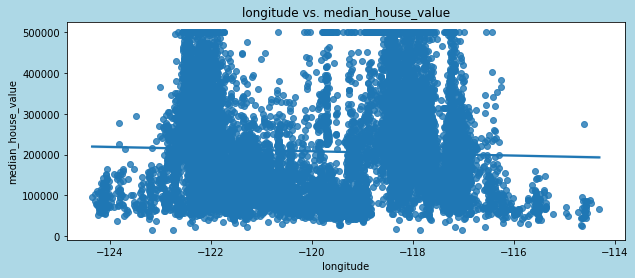

latitude vs. median_house_value Results:

Correlation Coefficient: -0.1441602768746593
p_value: 2.9398592907424878e-96
There is a significant evidence of a negative relationship between latitude and Median House Value


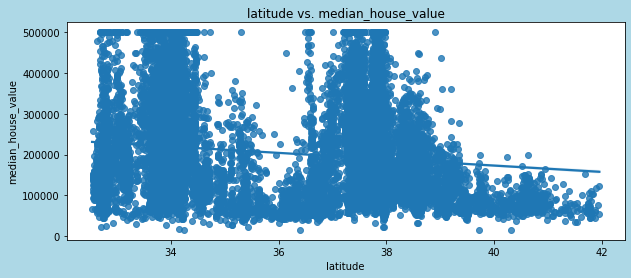

housing_median_age vs. median_house_value Results:

Correlation Coefficient: 0.10562341249320993
p_value: 2.7618606761502365e-52
There is a significant evidence of a positive relationship between housing_median_age and Median House Value


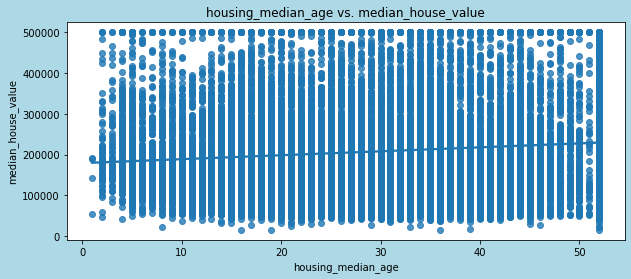

total_rooms vs. median_house_value Results:

Correlation Coefficient: 0.1341531138065631
p_value: 1.6893845634754333e-83
There is a significant evidence of a positive relationship between total_rooms and Median House Value


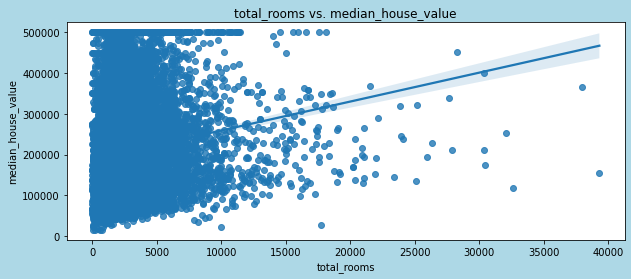

total_bedrooms vs. median_house_value Results:

Correlation Coefficient: 0.049456861920854564
p_value: 1.1671461983715622e-12
There is a significant evidence of a positive relationship between total_bedrooms and Median House Value


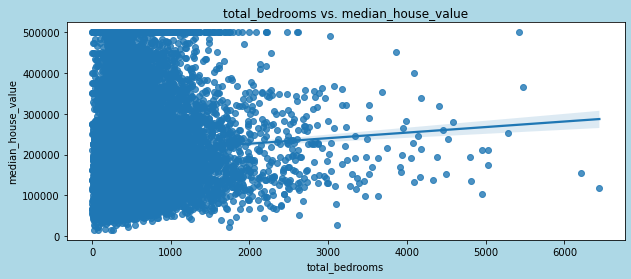

population vs. median_house_value Results:

Correlation Coefficient: -0.02464967888889489
p_value: 0.0003976307847911049
There is a significant evidence of a negative relationship between population and Median House Value


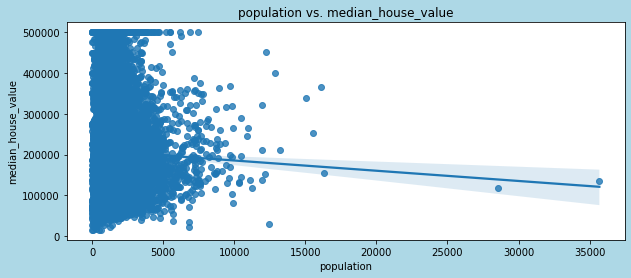

households vs. median_house_value Results:

Correlation Coefficient: 0.06584265057005645
p_value: 2.8234206519537093e-21
There is a significant evidence of a positive relationship between households and Median House Value


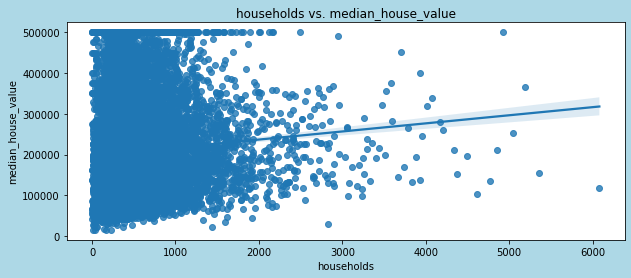

median_income vs. median_house_value Results:

Correlation Coefficient: 0.6880752079585479
p_value: 0.0
There is a significant evidence of a positive relationship between median_income and Median House Value


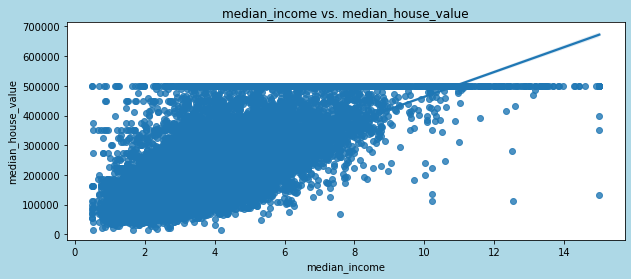

In [60]:
significant_features = []
for col in numeric_cols_stats:
    corr, pvalue = scipy.stats.pearsonr(data[col],data['median_house_value'])
    print(f'{col} vs. median_house_value Results:\n')
    print('Correlation Coefficient:',corr)
    print('p_value:',pvalue)
    
    if pvalue < 0.05:
        significant_features.append(col)
        if corr > 0:
            print(f'There is a significant evidence of a positive relationship between {col} and Median House Value')
        else:
            print(f'There is a significant evidence of a negative relationship between {col} and Median House Value')
    else:
        print(f'There is no significant relationship between {col} and Median House Value')
        
    plt.figure(figsize = (10,4), facecolor='lightblue')
    plt.title(f'{col} vs. median_house_value')
    sns.regplot(x=data[col], y=data['median_house_value'],data=data)
    plt.show()

In [61]:
significant_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [62]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [63]:
list(data.ocean_proximity.value_counts().index)

['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

Testing the significance of the categorical feature

State the hypothesis

-   $H_0: µ_1 = µ_2 = µ_3 = µ_4 = µ_5 $ (the  population means are equal)
-   $H_1:$ At least one of the means differ

In [64]:
_, p_value = scipy.stats.f_oneway(data[data['ocean_proximity'] == '<1H OCEAN']['median_house_value'],
                                  data[data['ocean_proximity'] == 'INLAND']['median_house_value'], 
                                  data[data['ocean_proximity'] == 'NEAR OCEAN']['median_house_value'],
                                  data[data['ocean_proximity'] == 'NEAR BAY']['median_house_value'],
                                  data[data['ocean_proximity'] == 'ISLAND']['median_house_value']
                                )
print('P-values: ', str(p_value))
if p_value < 0.05:
    print('There is a statistical evidence that ocean_proximity has a significant relationship with median_house_value')
    significant_features.append('ocean_proximity')
else:
        print('There is no statistical evidence that ocean_proximity has a significant relationship with median_house_value')


P-values:  0.0
There is a statistical evidence that ocean_proximity has a significant relationship with median_house_value


In [65]:
significant_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

As shown from the statistical analysis, ALL the features have significant relationship with the target.

## Features Engineering
In this section, I'll use pandas to transfrom the categroical features "ocean_proximity" to multiple features each for each distinct value in the original "ocean_proximity" feature.

In [66]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [67]:
df = data.copy()

In [68]:
ocean_proximity_ohc = pd.get_dummies(df['ocean_proximity'], drop_first=True)

In [69]:
df.drop('ocean_proximity', axis=1, inplace=True)

In [70]:
df = pd.concat([df, ocean_proximity_ohc], axis =1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


Selecting the features and target

In [71]:
# select the features
X = df.drop('median_house_value',axis=1)

# select the target
y = df.median_house_value

Although it is not necessary to normalize the targte varibale, sometimes it may lead to better model.

In [72]:
# normalize the target (as much as possible)
y = numpy.log1p(y)

## Spliting the Data and Buidling the Model

In [73]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold , cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [74]:
kf = KFold(shuffle=True, random_state = 2, n_splits = 5)

### Linear Model without Regularization

In [75]:
estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
                      ("scaler", StandardScaler()),
                      ("ridge_regression", LinearRegression())])

params = {'polynomial_features__degree': [1, 2, 3]}

grid = GridSearchCV(estimator, params, cv=kf)



In [76]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('ridge_regression',
                                        LinearRegression())]),
             param_grid={'polynomial_features__degree': [1, 2, 3]})

In [77]:
grid.best_score_.round(2), grid.best_params_

(0.66, {'polynomial_features__degree': 1})

In [78]:
degrees = [1,2,3,4]
lin_dict = {'degree':degrees, 'score':[]}

lr = LinearRegression()
s = StandardScaler()
for d in degrees:
    pf = PolynomialFeatures(degree=d)
    
    estimator = Pipeline([("polynomial_features", pf),
                          ("scaler", s),
                          ("linear_regression", lr)])
    
    y_red = cross_val_predict(estimator, X, y, cv = kf)
    
    score = numpy.round(r2_score(y,y_red),2)
    
    lin_dict['score'].append(score)
    

   degree         score
0       1  6.600000e-01
3       4 -1.896192e+20
2       3 -8.410814e+20
1       2 -7.105933e+21


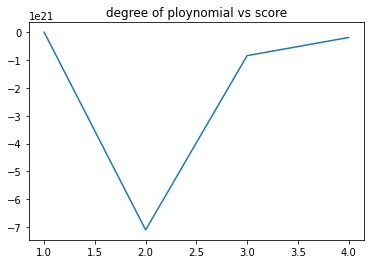

In [79]:
lin_df = pd.DataFrame(lin_dict)
print(lin_df.sort_values('score', ascending=False))

plt.plot(lin_df['degree'], lin_df['score'])
plt.title('degree of ploynomial vs score');

This verifies that the gridserach method output the best model prediction

## Linear Regression with L2 Regularization (Ridge)

In [80]:
rr_estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
                      ("scaler", StandardScaler()),
                      ("ridge_regression", Ridge())])

rr_params = {'polynomial_features__degree': [1, 2, 3],
          'ridge_regression__alpha': numpy.geomspace(0.00001, 100000, 11)
         }

rr_grid = GridSearchCV(rr_estimator, rr_params, cv=kf)

In [81]:
rr_grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])})

In [82]:
numpy.round(rr_grid.best_score_,3), rr_grid.best_params_

(0.713, {'polynomial_features__degree': 3, 'ridge_regression__alpha': 1000.0})

## Linear Regression with L1 Regularization (LASSO)

In [83]:
lr_estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
                         ("scaler", StandardScaler()),
                         ("lasso_regression", Lasso(max_iter = 100000))])

lr_params = {'polynomial_features__degree': [1,2,3],
             'lasso_regression__alpha': [0.001, 0.01, 0.1,1,10]
             }

lr_grid = GridSearchCV(lr_estimator, lr_params, cv=kf)

In [84]:
lr_grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('lasso_regression',
                                        Lasso(max_iter=100000))]),
             param_grid={'lasso_regression__alpha': [0.001, 0.01, 0.1, 1, 10],
                         'polynomial_features__degree': [1, 2, 3]})

In [85]:
numpy.round(lr_grid.best_score_,3), lr_grid.best_params_

(0.716, {'lasso_regression__alpha': 0.001, 'polynomial_features__degree': 3})

## ElasticNet

In [86]:
alphas = numpy.array([0.005, 0.05, 0.1, 1, 5, 20, 50, 80, 100, 120,140])
l1_ratios = numpy.linspace(0.1, 0.9, 9)

In [87]:
en_estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
                         ("scaler", StandardScaler()),
                         ("elasticNet_regression", ElasticNet(max_iter = 100000))])

en_params = {'polynomial_features__degree': [1,2,3],
             'elasticNet_regression__alpha': alphas,
             'elasticNet_regression__l1_ratio': l1_ratios
             }

en_grid = GridSearchCV(en_estimator, en_params, cv=kf)

In [88]:
en_grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('elasticNet_regression',
                                        ElasticNet(max_iter=100000))]),
             param_grid={'elasticNet_regression__alpha': array([5.0e-03, 5.0e-02, 1.0e-01, 1.0e+00, 5.0e+00, 2.0e+01, 5.0e+01,
       8.0e+01, 1.0e+02, 1.2e+02, 1.4e+02]),
                         'elasticNet_regression__l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'polynomial_features__degree': [1, 2, 3]})

In [89]:
numpy.round(en_grid.best_score_,3), en_grid.best_params_

(0.715,
 {'elasticNet_regression__alpha': 0.005,
  'elasticNet_regression__l1_ratio': 0.2,
  'polynomial_features__degree': 3})

From the scores registered, the lasso regression model has the best score. However, lasso model has tendency to bias, therefore, I will use ElsticNet.

In [90]:
best_estimator = Pipeline([("polynomial_features", PolynomialFeatures(degree=3)),
                           ("scaler", StandardScaler()),
                           ("elasticNet_regression", ElasticNet(alpha = 0.005, l1_ratio= 0.2, max_iter = 100000))])

best_estimator.fit(X, y)
best_estimator.score(X, y).round(2)

0.73

In [91]:
import joblib

In [92]:
joblib.dump(en_grid, 'best_estimator_en_regression.pkl')

['best_estimator_en_regression.pkl']